In [10]:
import numpy as np
from pandas import DataFrame, read_csv
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [11]:
file = 'sphere_XYZ_in_mm_new.xls'
df = pd.read_excel (r'sphere_XYZ_in_mm_new.xlsx', header=None)

In [12]:
data=np.array(df)
phi = np.linspace(0, np.pi, 16)
theta = np.linspace(0, 2 * np.pi, 32)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

/home/douglas/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


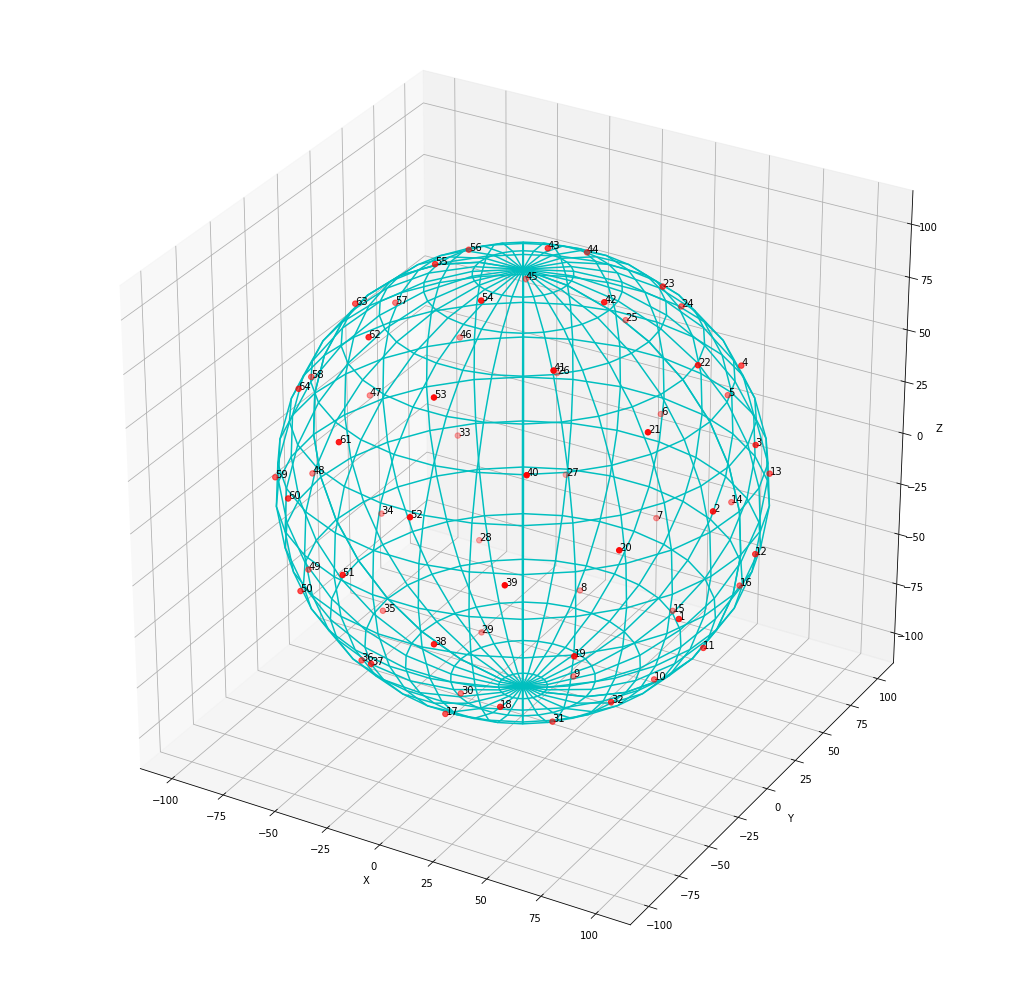

In [13]:
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x*101, y*101, z*101, color='c', rstride=1, cstride=1)
ax.scatter(data[:,0], data[:,1], data[:,2], color='r', s=30)
for idx in np.arange(64):
    
    ax.text(data[idx,0], data[idx,1], data[idx,2], idx+1, color='k')
    
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [14]:
import math

In [15]:
def cartesianop_para_esferico(x,y,z):
    r = np.sqrt(x**2 + y**2 + z**2)
    azimuth = np.arctan2(y,x)
    elevation = np.arctan2(np.sqrt(x**2 + y**2),z)
    azimuth = 180*azimuth/math.pi
    elevation = (180*elevation/math.pi)-90
    return azimuth, elevation #, r

In [16]:
aux=[0]
for idx in np.arange(len(data)):
    aux.append((cartesianop_para_esferico(data[idx,0],data[idx,1],data[idx,2])))

In [17]:
df2 = pd.DataFrame(aux)
df2.to_csv(r'sphere_cord.txt', header = False)

In [67]:
#data[2,:]